<a href="https://colab.research.google.com/github/victory2588/Machine-Learning/blob/main/CIFAR_10%EC%9D%84_%EC%9D%B8%EC%8B%9D%ED%95%98%EB%8A%94_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [ ]:
# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학슴
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

Epoch 1/30
391/391 - 14s - loss: 1.6607 - accuracy: 0.3896 - val_loss: 1.3071 - val_accuracy: 0.5349 - 14s/epoch - 37ms/step
Epoch 2/30
391/391 - 4s - loss: 1.2901 - accuracy: 0.5390 - val_loss: 1.1311 - val_accuracy: 0.5941 - 4s/epoch - 11ms/step
Epoch 3/30
391/391 - 4s - loss: 1.1336 - accuracy: 0.5986 - val_loss: 0.9866 - val_accuracy: 0.6544 - 4s/epoch - 10ms/step
Epoch 4/30
391/391 - 4s - loss: 1.0297 - accuracy: 0.6356 - val_loss: 1.0089 - val_accuracy: 0.6446 - 4s/epoch - 10ms/step
Epoch 5/30
391/391 - 5s - loss: 0.9409 - accuracy: 0.6670 - val_loss: 0.8400 - val_accuracy: 0.7042 - 5s/epoch - 12ms/step
Epoch 6/30
391/391 - 5s - loss: 0.8825 - accuracy: 0.6926 - val_loss: 0.7936 - val_accuracy: 0.7213 - 5s/epoch - 14ms/step
Epoch 7/30
391/391 - 5s - loss: 0.8283 - accuracy: 0.7093 - val_loss: 0.7544 - val_accuracy: 0.7395 - 5s/epoch - 12ms/step
Epoch 8/30
391/391 - 5s - loss: 0.7861 - accuracy: 0.7250 - val_loss: 0.7504 - val_accuracy: 0.7370 - 5s/epoch - 12ms/step
Epoch 9/30
391

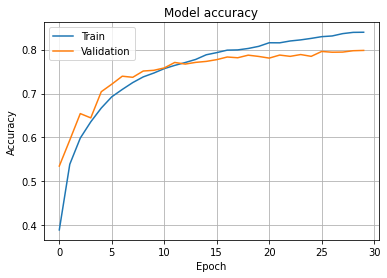

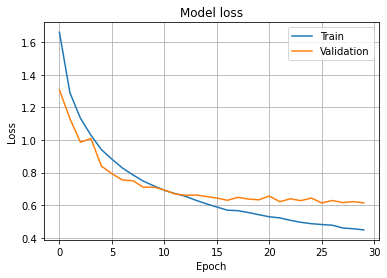

In [ ]:
import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

conv2d_12 (None, 30, 30, 32)
conv2d_13 (None, 28, 28, 32)
conv2d_14 (None, 12, 12, 64)
conv2d_15 (None, 10, 10, 64)
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step


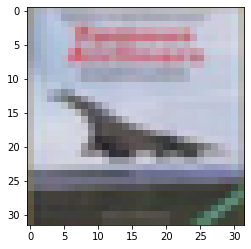

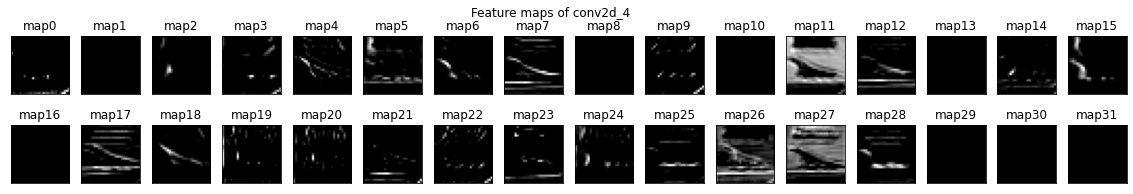

In [ ]:
# 컨볼루션 신경망의 특징 맵 시각화
for layer in cnn.layers:
  if 'conv' in layer.name:
    print(layer.name,layer.output.shape)
  
from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[1].output)
partial_model.summary()

feature_map=partial_model.predict(x_test)
fm=feature_map[3]

plt.imshow(x_test[3])

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32):
  plt.subplot(2,16,i+1)
  plt.imshow(fm[:,:,i],cmap='gray')
  plt.xticks([]);plt.yticks([])
  plt.title("map"+str(i))
plt.show()